In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd

In [13]:
url = 'https://raw.githubusercontent.com/Maxime-Michel-1999/Tweets_Sentiment_Analysis/main/Kickstarter.csv'
df = pd.read_csv(url, index_col = 0)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
sns.set_theme()

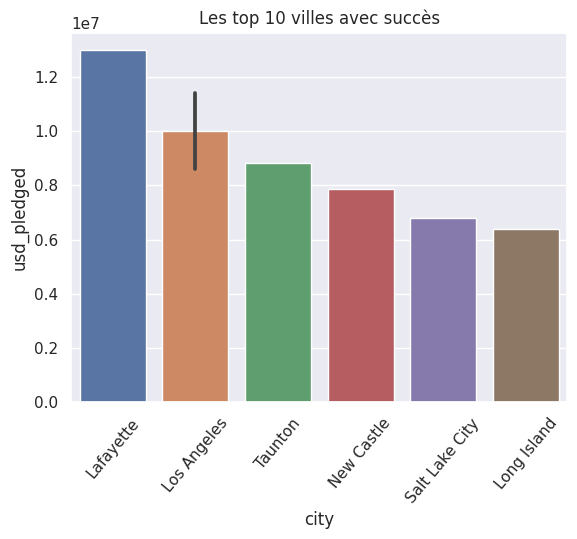

In [17]:
df.head()

#sns.countplot(x="status", data=df);
#Utilisation d'un filtre pour uniquement les succès et sort de l'argent collecté
success = df.loc[(df["status"] == 'successful'),:].sort_values('usd_pledged', ascending=False)
#Utilisation d'un filtre pour les échoués et sort de l'argent collecté
failed = df.loc[(df["status"] == 'failed'),:].sort_values('usd_pledged', ascending=False)
# Les top 10 villes avec succès
plt.title(label='Les top 10 villes avec succès')
sns.barplot(x="city", y="usd_pledged", data=success.head(10))
plt.xticks(rotation=50);



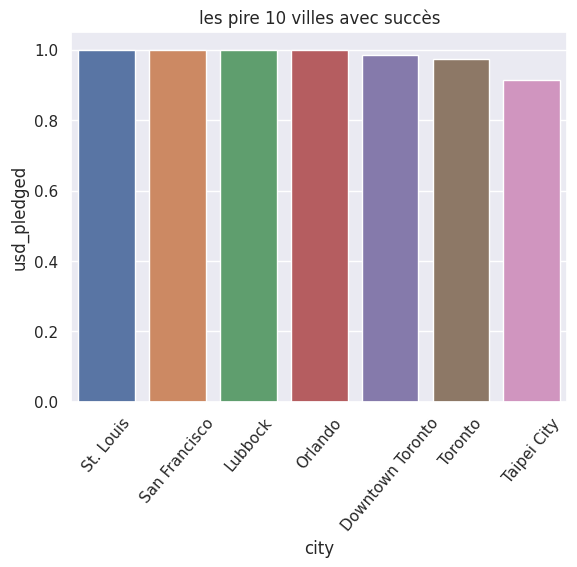

In [18]:
# les pire 10 villes avec succès
plt.title(label='les pire 10 villes avec succès')
sns.barplot(x="city", y="usd_pledged", data=success.tail(10))
plt.xticks(rotation=50);

In [19]:
df.nunique()

id               192888
name             192263
currency             15
launched_at      192696
backers_count      3438
blurb            191219
country              25
deadline         181261
slug             192888
status                4
usd_pledged       89142
sub_category         15
main_category       159
creator_id       164681
blurb_length        152
goal_usd          12153
city              13409
duration             93
dtype: int64

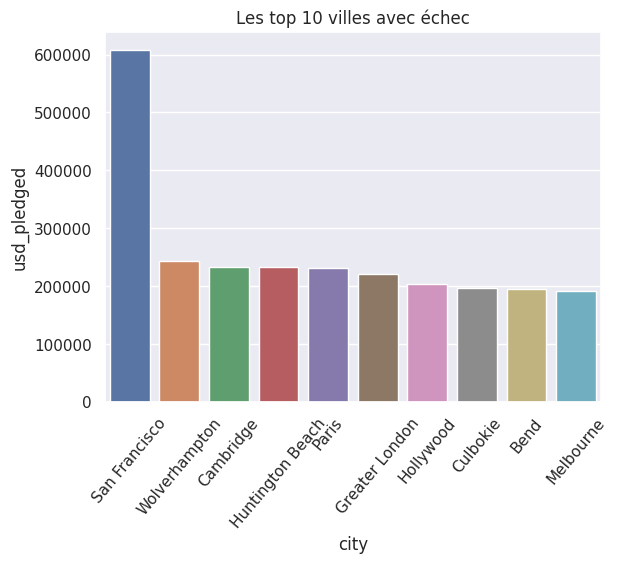

In [20]:
# Les top 10 villes avec échec
plt.title(label='Les top 10 villes avec échec')
sns.barplot(x="city", y="usd_pledged", data=failed.head(10))
plt.xticks(rotation=50);

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


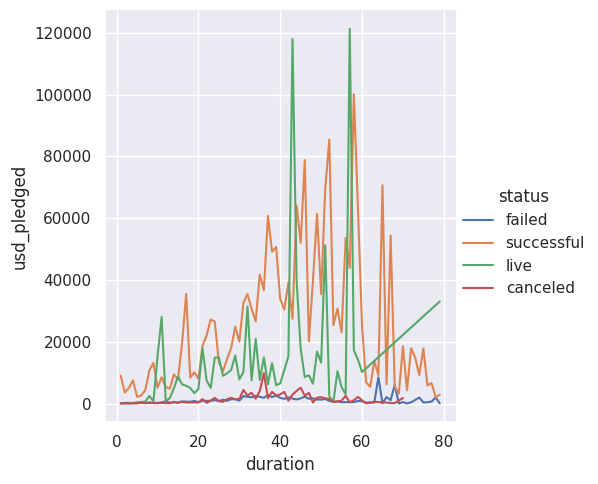

In [21]:
# Une courbe par modalité de la variable "status" basée sur la duré et les montants collectés
sns.relplot(x="duration", y="usd_pledged", kind="line",hue="status",ci=None, data=df[df['duration']<80] );

In [22]:
df.head()

,id,name,currency,launched_at,backers_count,blurb,country,deadline,slug,status,usd_pledged,sub_category,main_category,creator_id,blurb_length,goal_usd,city,duration
0,1714728788,Urban Farm Kits: Our Solution to City Farming,CAD,2018-02-10 22:47:52,16,"Earn $1,000 - $20,000+ by transforming idle re...",CA,2018-04-11 21:47:52,urban-farm-kits-our-solution-to-city-farming,failed,577.902078,food,Farms,41046209,122,785.82065,Victoria,60.0
1,1639965256,Reflections on the LHC Safety Report,USD,2014-11-21 10:42:26,7,"Need Peer Review, Open Source style",US,2014-12-15 10:42:26,reflections-on-the-lhc-safety-report-review-an...,successful,211.000000,publishing,Academic,1877377173,35,93.00000,San Diego,24.0
2,1582062943,Ultra-Custom Chocolate Bars,USD,2020-10-19 05:26:59,99,Ultra-customized bean to bar chocolate. Any fl...,US,2020-11-18 05:26:59,ultra-custom-chocolate-bars-0,successful,4697.000000,food,Small Batch,205122366,122,1500.00000,Philadelphia,30.0
3,1888984372,GlassWeb: Internet Monitoring,USD,2019-05-29 16:01:34,3,A module device to monitor internet connection...,US,2019-07-28 16:01:34,glassweb-internet-monitoring,failed,222.000000,technology,Gadgets,1458852038,69,25000.00000,Chicago,60.0
4,1409770586,Dreaming of Streaming - 96.9 FM KMRD-LP Madrid...,USD,2015-11-19 20:36:01,100,"Madrid's low power FM community radio station,...",US,2015-12-19 20:36:01,dreaming-of-streaming-969-fm-kmrd-lp-madrid-ne...,successful,5410.000000,publishing,Radio & Podcasts,1845213665,131,5000.00000,Madrid,30.0


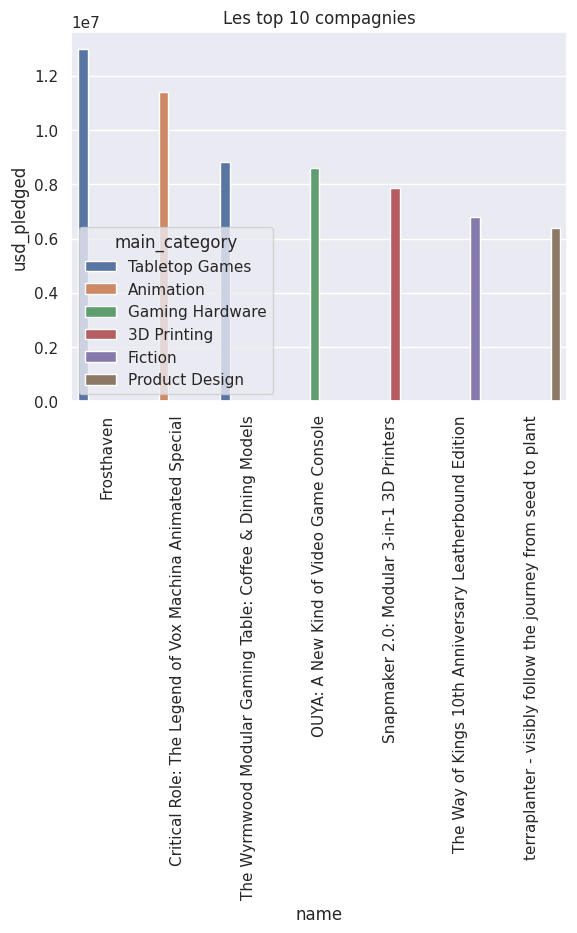

In [23]:
plt.title(label='Les top 10 compagnies')
sns.barplot(x="name", y="usd_pledged",hue="main_category", data=success.head(10))
plt.xticks(rotation=90);

In [ ]:
# Pour Mathilde 
city = df["city"]
usd_pledged = df["usd_pledged"]
plt.scatter(city, usd_pledged)
plt.xlabel("city")
plt.ylabel("usd_pledged")
plt.title("Levées de fonds par ville")
plt.xticks(rotation=90) 
plt.show()


In [ ]:


df_sorted =  df.sort_values('usd_pledged', ascending=False)
df_sorted.head(25).plot.scatter("city", "usd_pledged", s=30)
plt.xticks(rotation=90);

In [ ]:
top_cities = df.groupby('city').mean().sort_values('usd_pledged', ascending=False).head(10)

#Graphique à barres des dix premières villes
top_cities.plot(kind='bar', y='usd_pledged', figsize=(10, 6))
plt.title('Les 10 villes qui ont levé le plus de fonds en moyenne')
plt.xlabel('Ville')
plt.ylabel('Fonds levés (en millions de $USD)')
plt.show()

In [ ]:
city_totals = df.groupby('city')['usd_pledged'].sum().reset_index()
city_totals.plot(x='city', y='usd_pledged', kind='bar')
plt.show()
city_totals = city_totals.sort_values('usd_pledged', ascending=False)
city_totals.plot(x='city', y='usd_pledged', kind='bar')
plt.show()

In [ ]:
bins = [0, 1000, 10000, 50000, 100000, 500000, float('inf')]
labels = ['0-1k', '1k-10k', '10k-50k', '50k-100k', '100k-500k', '500k+']
df['funds_category'] = pd.cut(df['usd_pledged'], bins=bins, labels=labels)
city_funds = df.groupby(['city', 'usd_pledged']).size().unstack(fill_value=0)
city_amount_range = df.groupby(['city', 'uds_pledged']).size().reset_index(name='counts').head(10)
city_amount_range_pivot = city_amount_range.pivot(index='City', columns='usd_pledged', values='counts')
city_amount_range_pivot.plot.bar(stacked=True, figsize=(10,6))
plt.xlabel('City')
plt.ylabel('funds')
plt.show()

In [ ]:
df_sorted =  df.sort_values('goal_usd', ascending=False)
df_sorted.plot.scatter("city", "goal_usd", s=30)
plt.xticks(rotation=90);

In [ ]:
sub_category = df["sub_category"]
usd_pledged = df["usd_pledged"]
plt.scatter(sub_category, usd_pledged)
plt.xlabel("sub_category")
plt.ylabel("usd_pledged")
plt.title("Levées de fonds par secteur")
plt.show()

In [ ]:
plt.title(label='Levées de fonds par secteur')
sns.barplot(x="sub_category", y="usd_pledged",hue="sub_category", data=success.head(10))
plt.xticks(rotation=90)


In [ ]:
plt.title(label='Levées de fonds par secteur')
sns.barplot(x="sub_category", y="usd_pledged",hue="sub_category", data=success.head(10))
plt.xticks(rotation=90)

In [ ]:
cor=df.corr()
fig, ax=plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot=True, ax=ax, cmap="vlag");

In [ ]:
sns.pairplot(df.iloc[:13], diag_kind="kde");

In [ ]:
sns.relplot(x="backers_count",y="usd_pledged",hue="sub_category",style="sub_category",row="status",col="blurb_length",kind="line",height=4, data=df);